In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                       

In [2]:
globaltemp=pd.read_csv("D:/analytics/Predictive_Analysis2/IOT_Time_Series_Analysis/GlobalLandTemperaturesByCountry.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
globaltemp.shape

(577462, 7)

In [4]:
globaltemp.describe()

,AverageTemperature,AverageTemperatureUncertainty,Unnamed: 4,Unnamed: 5
count,544811.000000,545550.000000,0.0,0.0
mean,17.193354,1.019057,NaN,NaN
std,10.953966,1.201930,NaN,NaN
min,-37.658000,0.052000,NaN,NaN
25%,10.025000,0.323000,NaN,NaN
50%,20.901000,0.571000,NaN,NaN
75%,25.814000,1.206000,NaN,NaN
max,38.842000,15.003000,NaN,NaN


In [5]:
## Country List - unique value in the df['name'] column
globaltemp.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
globaltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
0,1743-11-01,4.384,2.294,Åland,NaN,NaN,Åland
1,1743-12-01,NaN,NaN,Åland,NaN,NaN,Afghanistan
2,1744-01-01,NaN,NaN,Åland,NaN,NaN,Africa
3,1744-02-01,NaN,NaN,Åland,NaN,NaN,Albania
4,1744-03-01,NaN,NaN,Åland,NaN,NaN,Algeria


In [7]:
indiatemp=globaltemp[globaltemp.Country=="India"]  ##for subset

In [8]:
indiatemp.shape


(2613, 7)

In [9]:
indiatemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
243695,1796-01-01,17.044,2.044,India,NaN,NaN,NaN
243696,1796-02-01,19.193,1.359,India,NaN,NaN,NaN
243697,1796-03-01,22.319,2.125,India,NaN,NaN,NaN
243698,1796-04-01,27.233,1.510,India,NaN,NaN,NaN
243699,1796-05-01,30.035,1.338,India,NaN,NaN,NaN


In [10]:
indiatemp=indiatemp[["dt","AverageTemperature"]]

In [11]:
indiatemp.head()

,dt,AverageTemperature
243695,1796-01-01,17.044
243696,1796-02-01,19.193
243697,1796-03-01,22.319
243698,1796-04-01,27.233
243699,1796-05-01,30.035


In [12]:
indiatemp.dtypes  # as dt is in object we should convert it into date time

dt                     object
AverageTemperature    float64
dtype: object

In [13]:
from datetime import datetime # as dt is in object we should convert it into date time which is not used for modelling purpose

In [14]:
indiatemp.dt=pd.to_datetime(indiatemp.dt)

In [15]:
indiatemp.index=indiatemp.dt

In [16]:
indiatemp.head()

,dt,AverageTemperature
dt,,
1796-01-01,1796-01-01,17.044
1796-02-01,1796-02-01,19.193
1796-03-01,1796-03-01,22.319
1796-04-01,1796-04-01,27.233
1796-05-01,1796-05-01,30.035


In [17]:
indiatemp1=indiatemp.drop('dt',axis=1)

In [18]:
indiatemp1.shape

(2613, 1)

In [19]:
indiatemp1.head()

,AverageTemperature
dt,
1796-01-01,17.044
1796-02-01,19.193
1796-03-01,22.319
1796-04-01,27.233
1796-05-01,30.035


In [20]:
indtemp=indiatemp1['1913':]

In [21]:
indtemp.head()

,AverageTemperature
dt,
1913-01-01,16.626
1913-01-02,19.358
1913-01-03,22.333
1913-01-04,28.176
1913-01-05,29.167


In [22]:
indtemp.tail()

,AverageTemperature
dt,
2013-01-05,31.014
2013-01-06,28.766
2013-01-07,27.012
2013-01-08,26.555
2013-01-09,NaN


In [23]:
indtemp=indtemp.dropna()

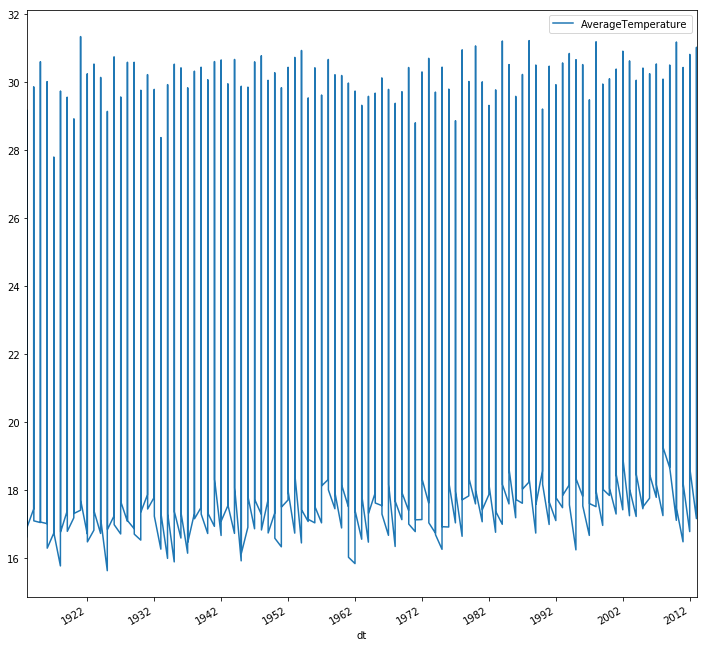

In [24]:
indtemp.plot(kind="line",figsize=(12,12))

In [26]:
indtemp.describe

<bound method NDFrame.describe of             AverageTemperature
dt                            
1913-01-01              16.626
1913-01-02              19.358
1913-01-03              22.333
1913-01-04              28.176
1913-01-05              29.167
1913-01-06              27.926
1913-01-07              26.644
1913-01-08              26.228
1913-01-09              26.316
1913-01-10              24.574
1913-01-11              20.150
1913-01-12              16.912
1914-01-01              17.441
1914-01-02              19.372
1914-01-03              23.091
1914-01-04              26.634
1914-01-05              29.852
1914-01-06              28.936
1914-01-07              26.629
1914-01-08              26.016
1914-01-09              25.994
1914-01-10              23.830
1914-01-11              21.017
1914-01-12              17.094
1915-01-01              17.044
1915-01-02              18.730
1915-01-03              23.344
1915-01-04              27.327
1915-01-05              30.590
1915-

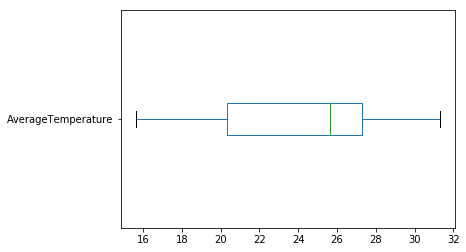

In [27]:
indtemp.plot(kind="box",vert=False)

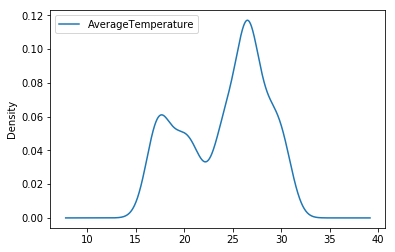

In [28]:
indtemp.plot(kind="density")

In [29]:
indiatemp.head()

,dt,AverageTemperature
dt,,
1796-01-01,1796-01-01,17.044
1796-02-01,1796-02-01,19.193
1796-03-01,1796-03-01,22.319
1796-04-01,1796-04-01,27.233
1796-05-01,1796-05-01,30.035


In [30]:
indiatemp['Year']=indiatemp["dt"].apply(lambda x:x.year)  #split the year/month/week for weeekday use weekday()

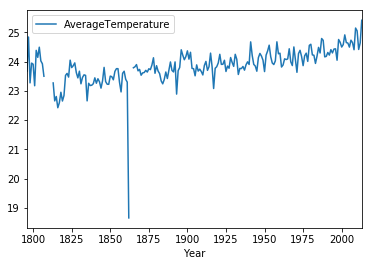

In [31]:
indiatemp.groupby(['Year']).mean().plot(kind="line") #plot by grouping it by year

In [32]:
from statsmodels.tsa.stattools import adfuller  #dickey fuller

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
indtempadf=adfuller(indtemp.AverageTemperature)

In [34]:
indtempadf  # second line is pvalue, lag value after which data is stationary is 23

(-3.89485387455592,
 0.0020730478718128278,
 23,
 1184,
 {'1%': -3.4358850794152054,
  '10%': -2.5680713280964662,
  '5%': -2.8639841761618654},
 2309.9188759080243)

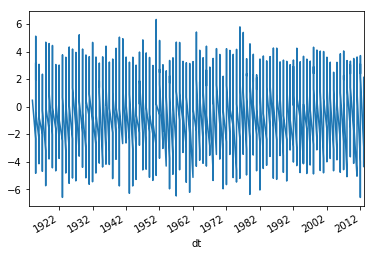

In [35]:
indtemp.AverageTemperature.diff(23).plot(kind="line") #this what staionary data looks like

In [36]:
# till above steps we broght data to stationality

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose  #time series decomposition

In [38]:
indtempdecomp=seasonal_decompose(indtemp.AverageTemperature,model="multiplicative",freq=12)

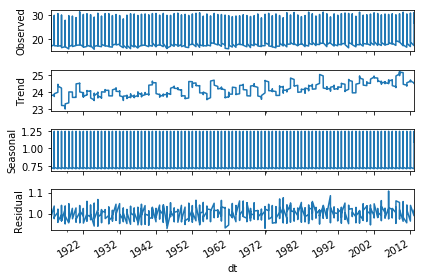

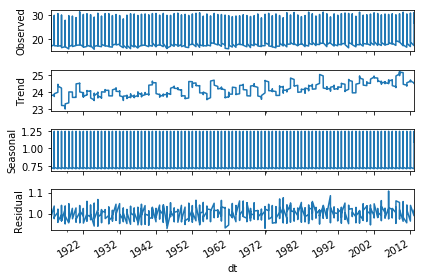

In [39]:
indtempdecomp.plot()

In [40]:
indtempdecomp=seasonal_decompose(indtemp.AverageTemperature,model="additive",freq=12)

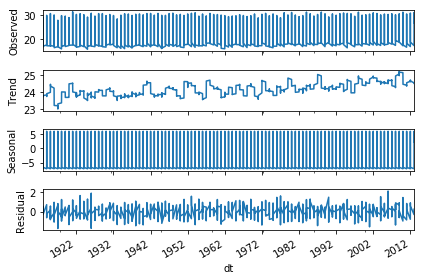

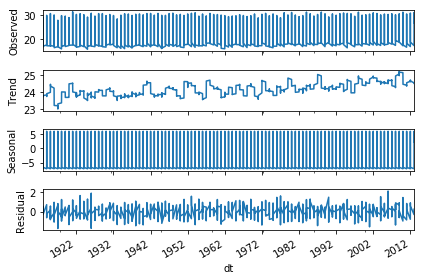

In [41]:
indtempdecomp.plot()

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

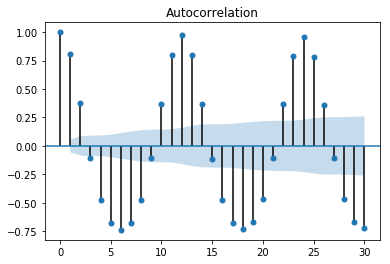

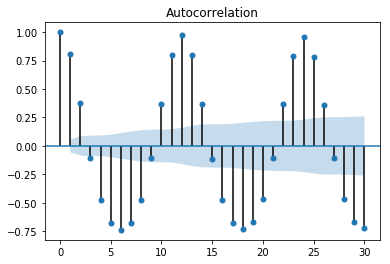

In [43]:
plot_acf(indtemp.AverageTemperature,lags=30)  #x-axis=lags, frst point where the lag becomes negative is P in ARIMA theerefore p=2, by default d differentiation is 0 if model fits if not make it to 1

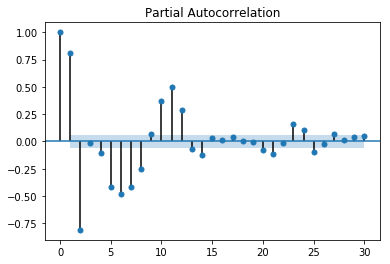

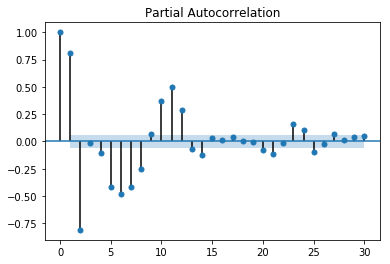

In [44]:
plot_pacf(indtemp.AverageTemperature,lags=30) # for the point where frst lag reaches negative q value in ARIMA same like p therefore q=2

In [113]:
# therefore p=2, d=0, q=2 in ARIMA

In [45]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [46]:
p=d=q=range(0,3)                                #to find out pdq automaticallynand see the results which have least AIC that is our pdq values
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(indtemp.AverageTemperature,order=param)
        results=mod.fit()
        print('ARIMA{}-AIC:{}'.format(param,results.aic))
    except:
        continue

ARIMA(0, 0, 0)-AIC:6942.580154069212
ARIMA(0, 0, 1)-AIC:5711.185861660682
ARIMA(0, 1, 0)-AIC:5769.88210181346
ARIMA(0, 1, 1)-AIC:5123.180377815921
ARIMA(0, 2, 0)-AIC:5356.877605039622
ARIMA(0, 2, 1)-AIC:5286.6971848055055
ARIMA(0, 2, 2)-AIC:5286.292973905554
ARIMA(1, 0, 0)-AIC:5657.695046977893
ARIMA(1, 0, 1)-AIC:4960.087215077598
ARIMA(1, 0, 2)-AIC:5690.519589458544
ARIMA(1, 1, 0)-AIC:5126.5999222998735
ARIMA(1, 2, 0)-AIC:5297.436876485246
ARIMA(2, 0, 0)-AIC:4337.7668002167775
ARIMA(2, 0, 2)-AIC:4129.974227698419
ARIMA(2, 1, 0)-AIC:4800.262264587518
ARIMA(2, 2, 0)-AIC:5256.828790574351


In [47]:
#hence by observibg above values ARIMA(2,0,2) has the least AIC hence ARIMA(p,d,q)=ARIMA(2,0,2)

In [48]:
# Model Fitting

In [49]:
model=ARIMA(indtemp.AverageTemperature,order=(2,0,2),freq='M')

In [50]:
results=model.fit()

In [51]:
temppredict=results.predict('2013-01-08','2017-01-12')

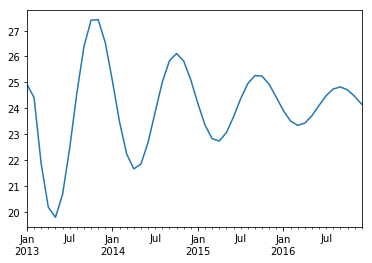

In [52]:
temppredict.plot()

In [53]:
results.forecast(30)   #next 30months forecast 1st array is predicted values, 2nd array is standard error, 3rd array lower and upper interval

(array([ 24.41218386,  21.84540957,  20.17198847,  19.78123116,
         20.66540983,  22.4583965 ,  24.57170318,  26.38066085,
         27.40369192,  27.42481504,  26.53008958,  25.05563784,
         23.47000555,  22.23002618,  21.65322071,  21.84115549,
         22.67066605,  23.84918665,  25.01271372,  25.83489478,
         26.11549411,  25.82521116,  25.09823595,  24.17943795,
         23.34522983,  22.82281387,  22.73070531,  23.05533146,
         23.66698488,  24.36702296]),
 array([ 1.32817735,  2.09753267,  2.31623272,  2.31953131,  2.42030856,
         2.71784079,  3.04965921,  3.25130446,  3.30211152,  3.30320905,
         3.36899494,  3.51435064,  3.66084664,  3.73873226,  3.75104452,
         3.7561368 ,  3.80278331,  3.88361856,  3.95401861,  3.98455087,
         3.98654781,  3.99388039,  4.02606251,  4.07150795,  4.10525475,
         4.11645673,  4.11648999,  4.12399541,  4.14527942,  4.17034039]),
 array([[ 21.8090041 ,  27.01536362],
        [ 17.73432107,  25.95649807]

In [54]:
temppredict

2013-01-31    24.922412
2013-02-28    24.412184
2013-03-31    21.845410
2013-04-30    20.171988
2013-05-31    19.781231
2013-06-30    20.665410
2013-07-31    22.458396
2013-08-31    24.571703
2013-09-30    26.380661
2013-10-31    27.403692
2013-11-30    27.424815
2013-12-31    26.530090
2014-01-31    25.055638
2014-02-28    23.470006
2014-03-31    22.230026
2014-04-30    21.653221
2014-05-31    21.841155
2014-06-30    22.670666
2014-07-31    23.849187
2014-08-31    25.012714
2014-09-30    25.834895
2014-10-31    26.115494
2014-11-30    25.825211
2014-12-31    25.098236
2015-01-31    24.179438
2015-02-28    23.345230
2015-03-31    22.822814
2015-04-30    22.730705
2015-05-31    23.055331
2015-06-30    23.666985
2015-07-31    24.367023
2015-08-31    24.950150
2015-09-30    25.262854
2015-10-31    25.241889
2015-11-30    24.923803
2015-12-31    24.425477
2016-01-31    23.903826
2016-02-29    23.507924
2016-03-31    23.337737
2016-04-30    23.420473
2016-05-31    23.709601
2016-06-30    24

In [55]:
globaltemp.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [57]:
australiatemp = globaltemp[globaltemp.Country=='Australia']

In [58]:
australiatemp=australiatemp[["dt","AverageTemperature"]]

In [59]:
australiatemp.dtypes

dt                     object
AverageTemperature    float64
dtype: object

In [60]:
australiatemp.dt=pd.to_datetime(australiatemp.dt)

In [61]:
australiatemp.head()

,dt,AverageTemperature
34816,1852-07-01,14.116
34817,1852-08-01,15.330
34818,1852-09-01,18.740
34819,1852-10-01,21.984
34820,1852-11-01,24.073


In [62]:
australiatemp.index=australiatemp.dt

In [63]:
australiatemp['Year']=australiatemp["dt"].apply(lambda x:x.year)

In [64]:
australiatemp.groupby(['Year']).mean()

,AverageTemperature
Year,
1852,20.188500
1853,20.958250
1854,20.284778
1855,20.798636
1856,21.148333
1857,20.966417
1858,21.329833
1859,21.188917
1860,21.245500


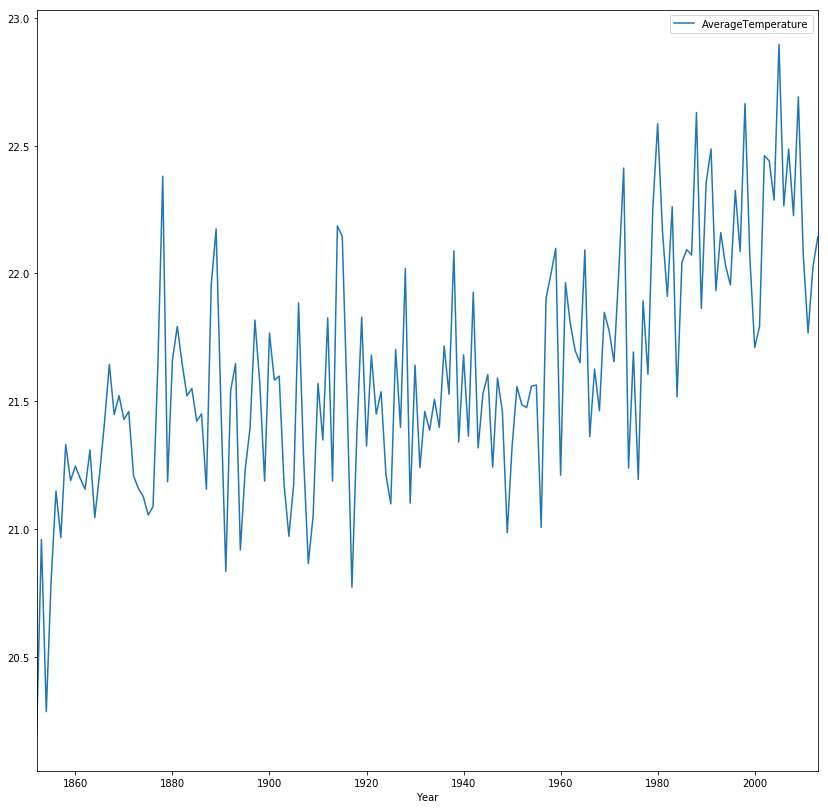

In [65]:
australiatemp.groupby(['Year']).mean().plot(kind="line", figsize=(14,14))

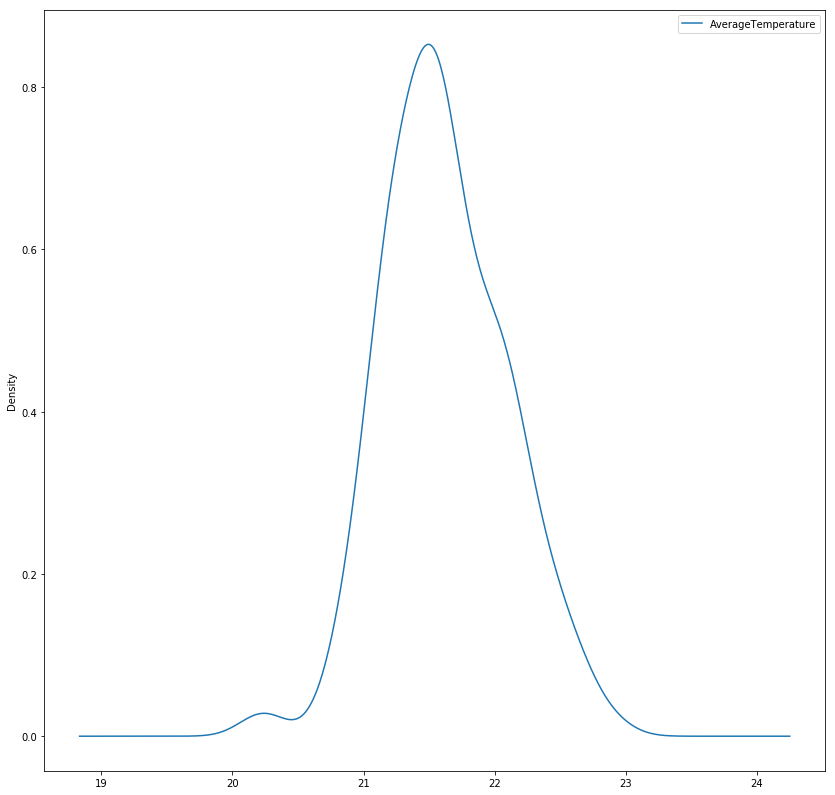

In [66]:
australiatemp.groupby(['Year']).mean().plot(kind="density", figsize=(14,14))

In [67]:
aussiestemp1=australiatemp['1913':]

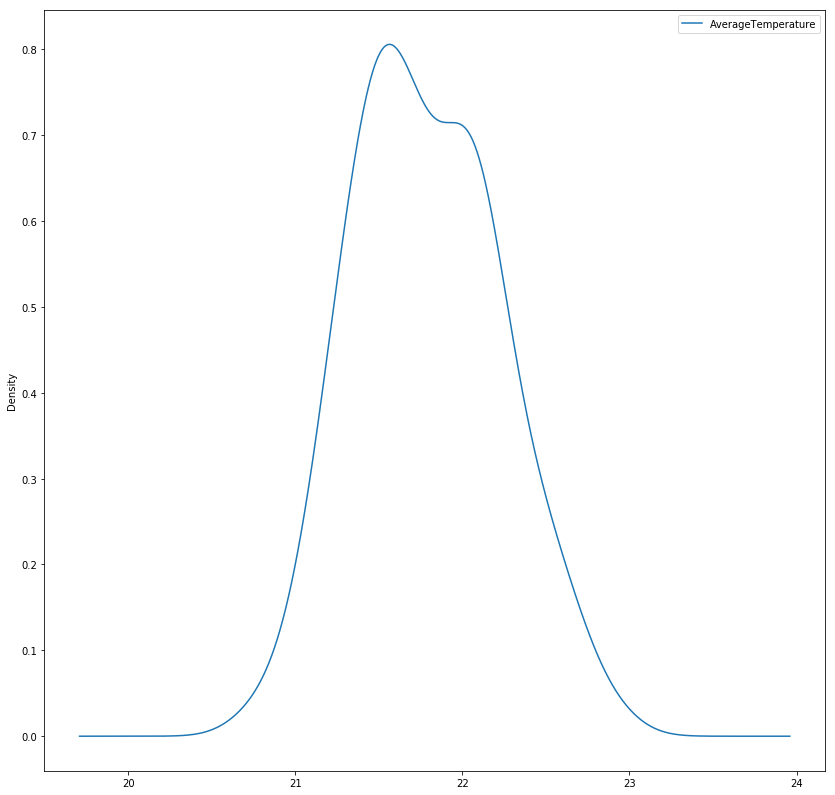

In [68]:
aussiestemp1.groupby(['Year']).mean().plot(kind="density", figsize=(14,14))

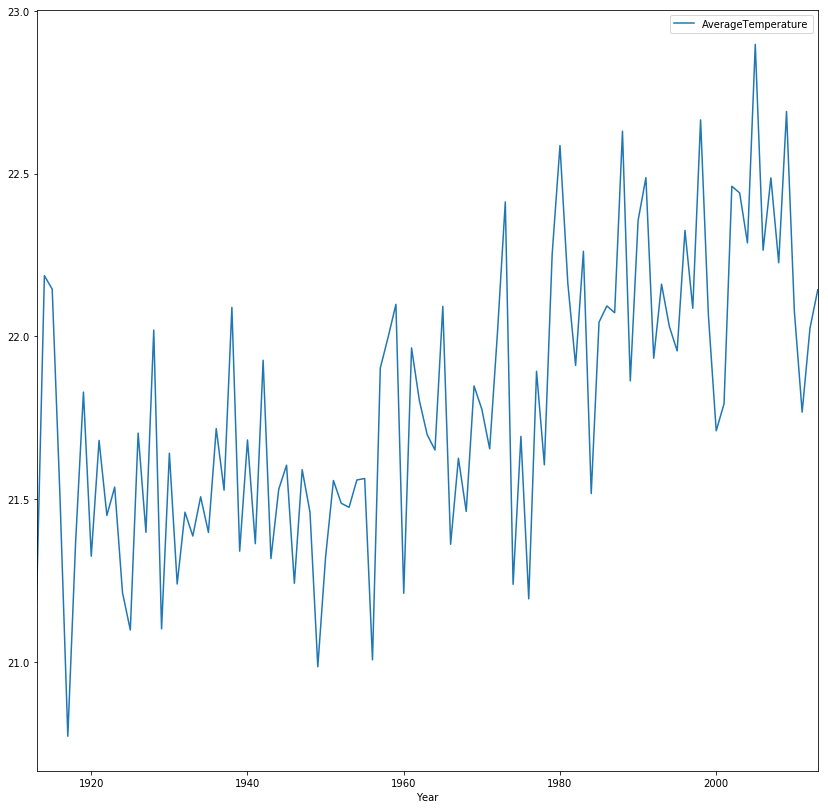

In [69]:
aussiestemp1.groupby(['Year']).mean().plot(kind="line", figsize=(14,14))

In [70]:
aussiestemp1=aussiestemp1.dropna()

In [71]:
aussiestempadf=adfuller(aussiestemp1.AverageTemperature)

In [72]:
aussiestempadf

(-3.3003759114128428,
 0.014861679601330512,
 23,
 1184,
 {'1%': -3.4358850794152054,
  '10%': -2.5680713280964662,
  '5%': -2.8639841761618654},
 2749.0958876079922)

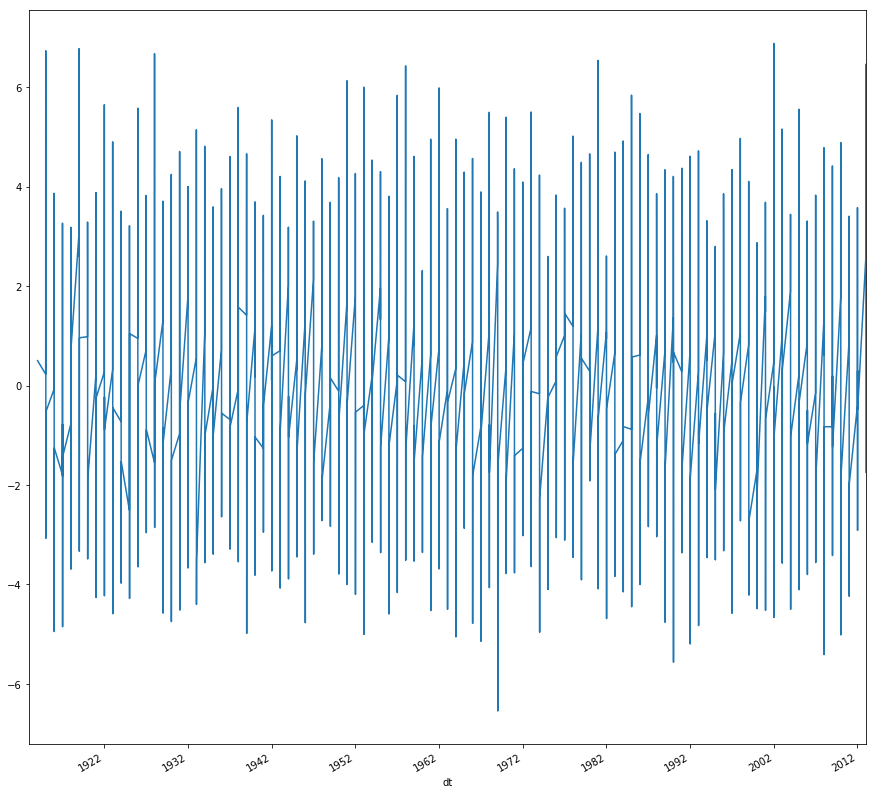

In [73]:
aussiestemp1.AverageTemperature.diff(23).plot(kind="line",figsize=(15,15))

In [74]:
result = seasonal_decompose(aussiestemp1.AverageTemperature,model="multiplicative",freq=12)

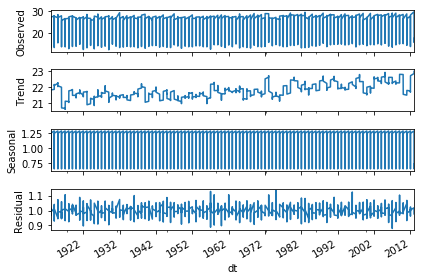

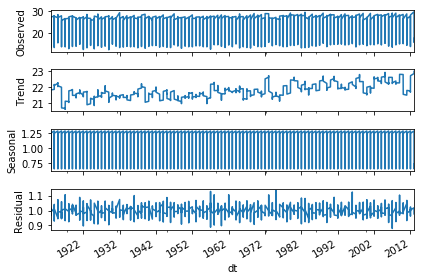

In [75]:
result.plot()

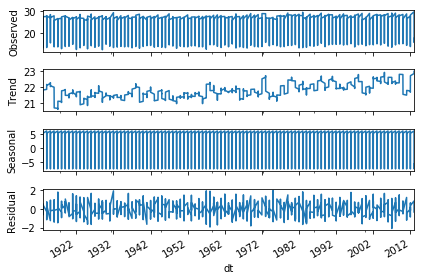

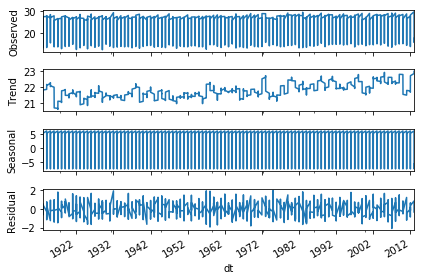

In [76]:
result1= seasonal_decompose(aussiestemp1.AverageTemperature, model='additive',freq=12)
result1.plot()

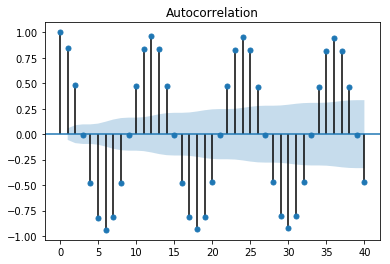

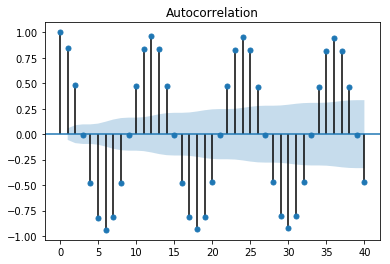

In [77]:
plot_acf(aussiestemp1.AverageTemperature,lags=40)

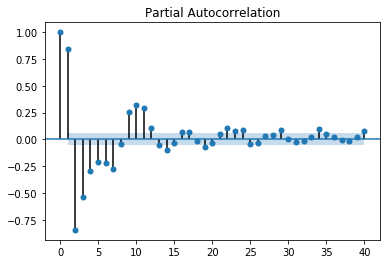

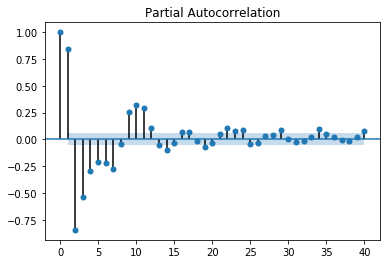

In [78]:
plot_pacf(aussiestemp1.AverageTemperature,lags=40)

In [80]:
###ARIMA
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(aussiestemp1.AverageTemperature,order=param)
        results=mod.fit()
        print('ARIMA{} - AIC:{}'.format(param,results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:7262.905352744534
ARIMA(0, 0, 1) - AIC:6051.765346994397
ARIMA(0, 0, 3) - AIC:4919.818079051003
ARIMA(0, 1, 0) - AIC:5813.865715873149
ARIMA(0, 1, 1) - AIC:5261.592720418497
ARIMA(0, 1, 3) - AIC:4783.059390856214
ARIMA(0, 1, 4) - AIC:4694.51569345555
ARIMA(0, 2, 0) - AIC:5161.42293032902
ARIMA(0, 2, 1) - AIC:5163.046947106755
ARIMA(0, 2, 2) - AIC:5049.549167330064
ARIMA(0, 2, 3) - AIC:5035.104157454141
ARIMA(0, 2, 4) - AIC:4787.205039079853
ARIMA(1, 0, 0) - AIC:5726.9429654569985
ARIMA(1, 0, 1) - AIC:5135.358009125471
ARIMA(1, 0, 2) - AIC:4806.288383436403
ARIMA(1, 0, 3) - AIC:5268.339882013919
ARIMA(1, 0, 4) - AIC:4870.702619103282
ARIMA(1, 1, 0) - AIC:4977.096774540954
ARIMA(1, 2, 0) - AIC:5162.868712165355
ARIMA(2, 0, 0) - AIC:4197.466740799806
ARIMA(2, 0, 2) - AIC:3535.6909816142643


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ARIMA(2, 1, 0) - AIC:4931.833373109052


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:3284.5910163146764


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 4) - AIC:3120.1300092307147
ARIMA(2, 2, 0) - AIC:5095.763996931563
ARIMA(3, 0, 0) - AIC:3777.1357984506785


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2) - AIC:3139.407980936881
ARIMA(3, 0, 3) - AIC:3133.118560367316


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4) - AIC:3113.0689223677477
ARIMA(3, 1, 0) - AIC:4579.7610333239945


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARIMA(3, 1, 4) - AIC:3227.229421327846
ARIMA(3, 2, 0) - AIC:5091.053030090445
ARIMA(4, 0, 0) - AIC:3666.8568567988855
ARIMA(4, 0, 2) - AIC:3177.397760438661
ARIMA(4, 1, 0) - AIC:4336.396960701913


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3) - AIC:3440.5932440317024
ARIMA(4, 2, 0) - AIC:4987.749137492072


In [81]:
model=ARIMA(aussiestemp1.AverageTemperature,order=(3,0,4), freq='M')
results=model.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [82]:
temppredict=results.predict('2010-01-08','2018-03-12')

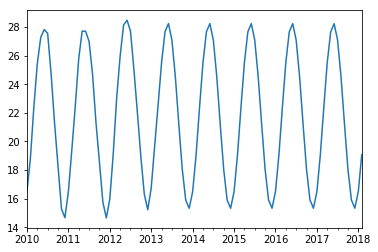

In [83]:
temppredict.plot()

In [84]:
results.forecast(30)

(array([ 19.68551969,  22.56197529,  25.50863906,  27.67327476,
         28.24890689,  27.09263868,  24.5138439 ,  21.20361413,
         18.04894824,  15.89510486,  15.31912298,  16.47522677,
         19.05353073,  22.36310231,  25.51711764,  27.67049249,
         28.24631337,  27.09039924,  24.51258475,  21.2036713 ,
         18.05030638,  15.89739998,  15.32174005,  16.47746456,
         19.05478966,  22.36304512,  25.51575975,  27.66819781,
         28.24369682,  27.08816192]),
 array([ 0.86705232,  0.96149405,  0.97524542,  0.97579348,  0.97617842,
         0.9764808 ,  0.97658411,  0.97658417,  0.97667936,  0.97697287,
         0.97736943,  0.97767078,  0.97777394,  0.97777399,  0.97786904,
         0.97816208,  0.978558  ,  0.97885885,  0.97896184,  0.97896189,
         0.97905679,  0.97934936,  0.97974464,  0.98004501,  0.98014782,
         0.98014788,  0.98024263,  0.98053473,  0.98092937,  0.98122925]),
 array([[ 17.98612837,  21.384911  ],
        [ 20.67748159,  24.44646899]

In [85]:
results.predict('2013-01-08','2018-03-31')

2013-01-31    16.737001
2013-02-28    19.685520
2013-03-31    22.561975
2013-04-30    25.508639
2013-05-31    27.673275
2013-06-30    28.248907
2013-07-31    27.092639
2013-08-31    24.513844
2013-09-30    21.203614
2013-10-31    18.048948
2013-11-30    15.895105
2013-12-31    15.319123
2014-01-31    16.475227
2014-02-28    19.053531
2014-03-31    22.363102
2014-04-30    25.517118
2014-05-31    27.670492
2014-06-30    28.246313
2014-07-31    27.090399
2014-08-31    24.512585
2014-09-30    21.203671
2014-10-31    18.050306
2014-11-30    15.897400
2014-12-31    15.321740
2015-01-31    16.477465
2015-02-28    19.054790
2015-03-31    22.363045
2015-04-30    25.515760
2015-05-31    27.668198
2015-06-30    28.243697
                ...    
2015-10-31    18.051664
2015-11-30    15.899694
2015-12-31    15.324356
2016-01-31    16.479701
2016-02-29    19.056048
2016-03-31    22.362988
2016-04-30    25.514402
2016-05-31    27.665904
2016-06-30    28.241081
2016-07-31    27.085926
2016-08-31    24

In [86]:
aussiestemp1.tail()

,dt,AverageTemperature,Year
dt,,,
2013-01-04,2013-01-04,23.305,2013
2013-01-05,2013-01-05,19.377,2013
2013-01-06,2013-01-06,16.018,2013
2013-01-07,2013-01-07,15.933,2013
2013-01-08,2013-01-08,17.748,2013


In [87]:
## Now will do it for Denmark

dktemp=globaltemp[globaltemp.Country=="Denmark"]  ## Subsetting Denmark data

In [88]:
dktemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
142493,1823-01-01,-29.446,3.646,Denmark,NaN,NaN,NaN
142494,1823-02-01,-31.746,3.438,Denmark,NaN,NaN,NaN
142495,1823-03-01,-28.439,2.757,Denmark,NaN,NaN,NaN
142496,1823-04-01,-21.488,3.379,Denmark,NaN,NaN,NaN
142497,1823-05-01,-12.925,2.935,Denmark,NaN,NaN,NaN


In [89]:
dktemp=dktemp[["dt","AverageTemperature"]] ## Keeping only dt and Avgtemp vars

In [90]:
dktemp.head()

,dt,AverageTemperature
142493,1823-01-01,-29.446
142494,1823-02-01,-31.746
142495,1823-03-01,-28.439
142496,1823-04-01,-21.488
142497,1823-05-01,-12.925


In [91]:
dktemp.dtypes

dt                     object
AverageTemperature    float64
dtype: object

In [94]:
dktemp.dt=pd.to_datetime(dktemp.dt)

In [96]:
dktemp.index=dktemp.dt

In [97]:
dktemp.head()

,dt,AverageTemperature
dt,,
1823-01-01,1823-01-01,-29.446
1823-02-01,1823-02-01,-31.746
1823-03-01,1823-03-01,-28.439
1823-04-01,1823-04-01,-21.488
1823-05-01,1823-05-01,-12.925


In [100]:
dktemp['Year']=dktemp["dt"].apply(lambda x:x.year)

In [101]:
dktemp.groupby(['Year']).mean()

,AverageTemperature
Year,
1823,-18.644417
1824,-18.145167
1825,-18.183917
1826,-18.097333
1827,-17.900750
1828,-17.693750
1829,-18.118167
1830,-17.899750
1831,-18.623417


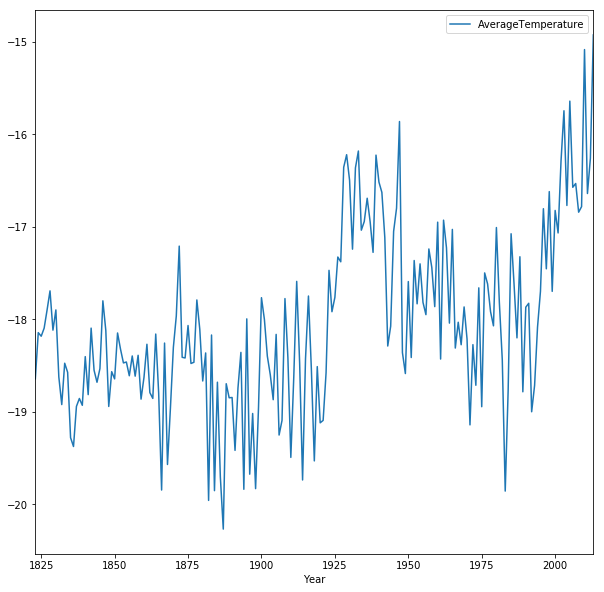

In [102]:
dktemp.groupby(['Year']).mean().plot(kind="line", figsize=(10,10))


In [104]:
dktemp1=dktemp['1913':] ## taking data from 1913 onwards

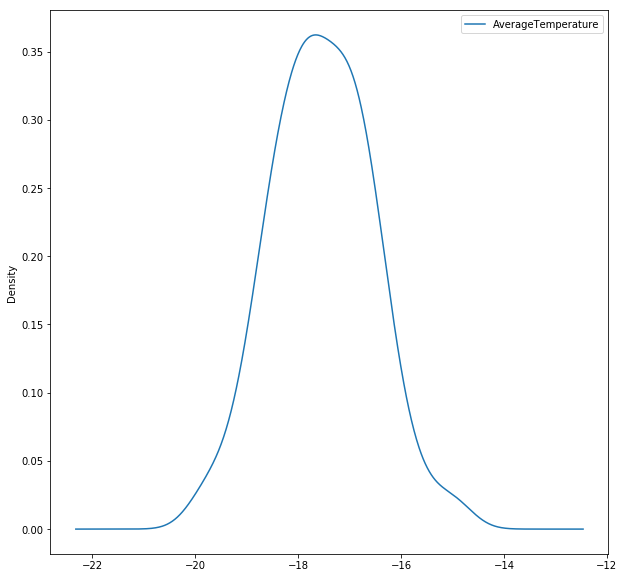

In [105]:
dktemp1.groupby(['Year']).mean().plot(kind="density", figsize=(10,10))

In [107]:
dktemp1=dktemp1.dropna()

In [108]:
dktempadf=adfuller(dktemp1.AverageTemperature)

In [109]:
dktempadf

(-3.7372092585031886,
 0.0036191937390794848,
 23,
 1184,
 {'1%': -3.4358850794152054,
  '10%': -2.5680713280964662,
  '5%': -2.8639841761618654},
 4716.7974055011437)

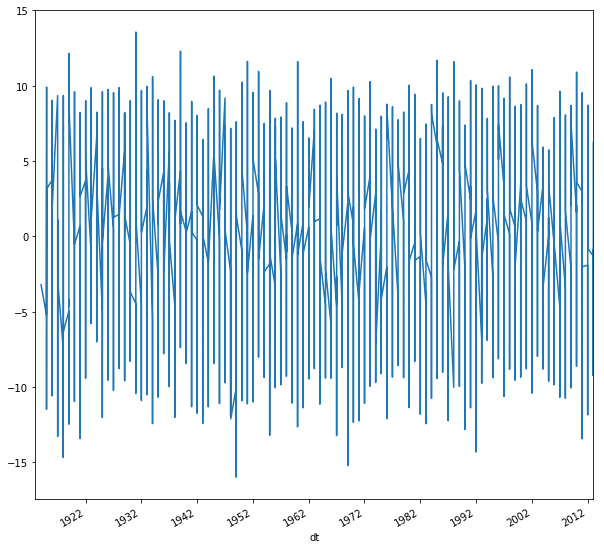

In [110]:
dktemp1.AverageTemperature.diff(23).plot(kind="line",figsize=(10,10))

In [111]:
dk_result = seasonal_decompose(dktemp1.AverageTemperature, model='additive',freq=12)

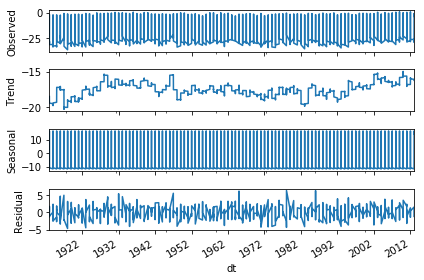

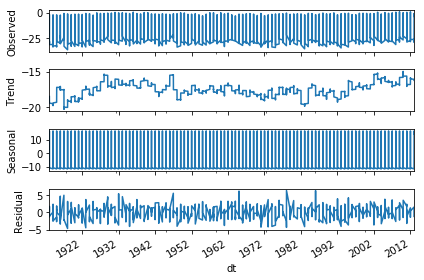

In [113]:
dk_result.plot()

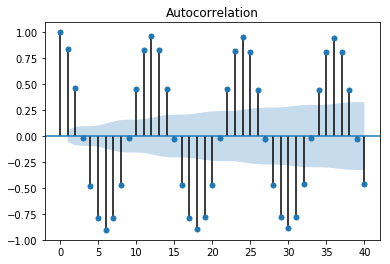

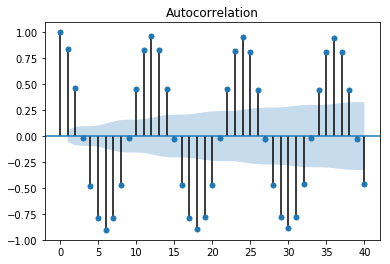

In [114]:
plot_acf(dktemp1.AverageTemperature,lags=40)

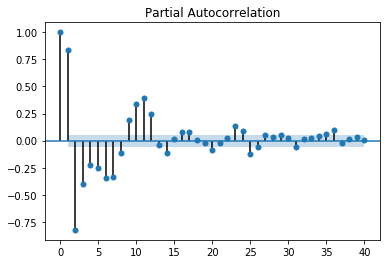

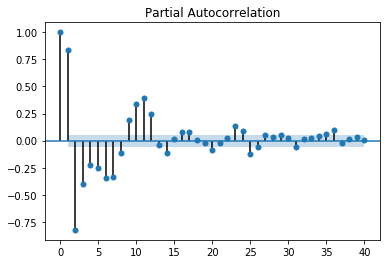

In [115]:
plot_pacf(dktemp1.AverageTemperature,lags=40)

In [116]:
###ARIMA

p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(dktemp1.AverageTemperature,order=param)
        results=mod.fit()
        print('ARIMA{} - AIC:{}'.format(param,results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:9137.650338296626
ARIMA(0, 0, 1) - AIC:7920.842587470882
ARIMA(0, 1, 0) - AIC:7750.697496599127
ARIMA(0, 1, 1) - AIC:7193.303607130446
ARIMA(0, 2, 0) - AIC:7198.727998286668
ARIMA(0, 2, 1) - AIC:7198.291987980975
ARIMA(0, 2, 2) - AIC:7173.248041383635
ARIMA(1, 0, 0) - AIC:7660.4220983144605
ARIMA(1, 0, 1) - AIC:7059.370131152113
ARIMA(1, 0, 2) - AIC:7906.306469786196
ARIMA(1, 1, 0) - AIC:6997.608116571032
ARIMA(1, 2, 0) - AIC:7197.75020528541
ARIMA(2, 0, 0) - AIC:6265.317560998493
ARIMA(2, 0, 2) - AIC:5834.309682269899
ARIMA(2, 1, 0) - AIC:6923.225520762577
ARIMA(2, 2, 0) - AIC:7186.086107377105


In [117]:
dk_model=ARIMA(dktemp1.AverageTemperature,order=(2,0,2), freq='M')
dk_results=dk_model.fit()

In [118]:
dk_temppredict=dk_results.predict('2010-01-08','2018-03-12')

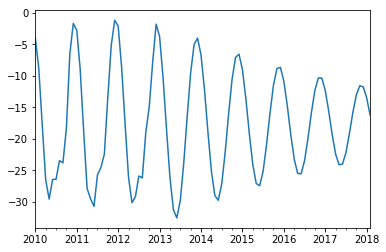

In [119]:
dk_temppredict.plot()

In [120]:
dk_results.forecast(30)

(array([-10.22078478, -18.41150857, -26.1020897 , -31.24945326,
        -32.55942989, -29.80850815, -23.86817078, -16.43516531,
         -9.54970403,  -5.03766421,  -4.02869837,  -6.67679447,
        -12.15140733, -18.89255926, -25.05283105, -29.00166969,
        -29.75488287, -27.21677659, -22.1763037 , -16.0664166 ,
        -10.55893045,  -7.10885704,  -6.57192112,  -8.99526675,
        -13.63165966, -19.16596645, -24.08621255, -27.09504599,
        -27.45006941, -25.14425368]),
 array([ 2.68835051,  3.69784112,  4.11304666,  4.15728518,  4.21805843,
         4.58486653,  5.15808848,  5.63864982,  5.85724077,  5.87778709,
         5.91912802,  6.1478288 ,  6.51203365,  6.82471726,  6.96553226,
         6.97662328,  7.0096037 ,  7.17551402,  7.43570655,  7.65747275,
         7.75456307,  7.76073691,  7.78848292,  7.91601084,  8.11134435,
         8.27506743,  8.34423982,  8.3476353 ,  8.37153588,  8.47251337]),
 array([[-15.48985497,  -4.9517146 ],
        [-25.65914398, -11.16387315]

In [121]:
dk_results.predict('2013-01-08','2018-03-31')

2013-01-31    -3.771487
2013-02-28   -10.220785
2013-03-31   -18.411509
2013-04-30   -26.102090
2013-05-31   -31.249453
2013-06-30   -32.559430
2013-07-31   -29.808508
2013-08-31   -23.868171
2013-09-30   -16.435165
2013-10-31    -9.549704
2013-11-30    -5.037664
2013-12-31    -4.028698
2014-01-31    -6.676794
2014-02-28   -12.151407
2014-03-31   -18.892559
2014-04-30   -25.052831
2014-05-31   -29.001670
2014-06-30   -29.754883
2014-07-31   -27.216777
2014-08-31   -22.176304
2014-09-30   -16.066417
2014-10-31   -10.558930
2014-11-30    -7.108857
2014-12-31    -6.571921
2015-01-31    -8.995267
2015-02-28   -13.631660
2015-03-31   -19.165966
2015-04-30   -24.086213
2015-05-31   -27.095046
2015-06-30   -27.450069
                ...    
2015-10-31   -11.481256
2015-11-30    -8.862346
2015-12-31    -8.659382
2016-01-31   -10.846561
2016-02-29   -14.758814
2016-03-31   -19.291137
2016-04-30   -23.209121
2016-05-31   -25.483848
2016-06-30   -25.560628
2016-07-31   -23.491826
2016-08-31   -19